In [1]:
%load_ext autoreload

# Enable autoreload for all modules
%autoreload 2


from generator import heterograph_from_vvg_generator
import pandas as pd
import os 

In [2]:
!pwd

/home/laurin/Documents/OCTA_project/repo/OCTA_gnn


In [8]:
diag_csv = "../../TumNeuro/diagnoses_aug_03_2023.csv"
#open the file with pandas

df = pd.read_csv(diag_csv, sep=',', header=0)
# show the dataframe
df.head()

# drop all the rows where QualityControl is "FAIL"
df = df[df.QualityControl != "FAIL"]
df.head()

,ImageName,Eye,Plexus,Date,QualityControl,Diagnosis,PatientID
0,1000091_19.04.2021_OD_SVC_OCTA,OD,SVC,2021/04/19,OK,HC,1000091
1,1000091_19.04.2021_OS_DVC_OCTA,OS,DVC,2021/04/19,OK,HC,1000091
2,1000091_19.04.2021_OS_SVC_OCTA,OS,SVC,2021/04/19,OK,HC,1000091
5,1000092_18.04.2021_OS_DVC_OCTA,OS,DVC,2021/04/18,OK,HC,1000092
6,1000092_18.04.2021_OS_SVC_OCTA,OS,SVC,2021/04/18,OK,HC,1000092


In [15]:
seg_path = f"../../TumNeuro/ves_seg"
# replace all the " " with "_" in the file names
for file in os.listdir(seg_path):
    os.rename(os.path.join(seg_path, file), os.path.join(seg_path, file.replace(" ", "_")))

In [18]:
# note: segmentation have "pred_" prefix
image_path = f"../../TumNeuro/images"
checked_image_path = f"../../TumNeuro/checked_images"
seg_path = f"../../TumNeuro/ves_seg"
checked_seg_path = f"../../TumNeuro/checked_seg"
# copy all the files mentioned in df["ImageName"]into image_path to checked_image_path
checked_image_path_DVC = f"../../TumNeuro/checked_images_DVC"
checked_seg_path_DVC = f"../../TumNeuro/checked_seg_DVC"

checked_image_path_SVC = f"../../TumNeuro/checked_images_SVC"
checked_seg_path_SVC = f"../../TumNeuro/checked_seg_SVC"

for index, row in df.iterrows():
    image_name = row["ImageName"]
    #check "Plexus" if the image is SVC or DVC
    if row["Plexus"] == "SVC":
        checked_image_path = checked_image_path_SVC
        checked_seg_path = checked_seg_path_SVC
    elif row["Plexus"] == "DVC":
        checked_image_path = checked_image_path_DVC
        checked_seg_path = checked_seg_path_DVC
    else:
        print(f"ERROR: {row['Plexus']} is not SVC or DVC")
        continue

    # append .png if not already there
    if not image_name.endswith(".png"):
        image_name = image_name + ".png"
    seg_name = "pred_" + image_name

    image_path_full = os.path.join(image_path, image_name)
    checked_image_path_full = os.path.join(checked_image_path, image_name)
    # check if the file exists
    if not os.path.isfile(image_path_full):
        print(f"ERROR: {image_path_full} not found")
        continue

    seg_path_full = os.path.join(seg_path, seg_name)
    checked_seg_path_full = os.path.join(checked_seg_path, seg_name)
    # check if the file exists
    if not os.path.isfile(seg_path_full):
        print(f"ERROR: {seg_path_full} not found")
        continue

    #print(image_path_full, checked_image_path_full)
    os.system(f"cp {image_path_full} {checked_image_path_full}")

    #print(seg_path_full, checked_seg_path_full)
    os.system(f"cp {seg_path_full} {checked_seg_path_full}")



2185925_OS


/home/laurin/Documents/OCTA_project/repo/OCTA_gnn/generator/heterograph_from_vvg_generator.py:151: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  region_labels = measure.label(morphology.remove_small_holes(seg, area_threshold=5, connectivity=1).astype("uint8"), background=1)


2949 622
13081
329780 7779


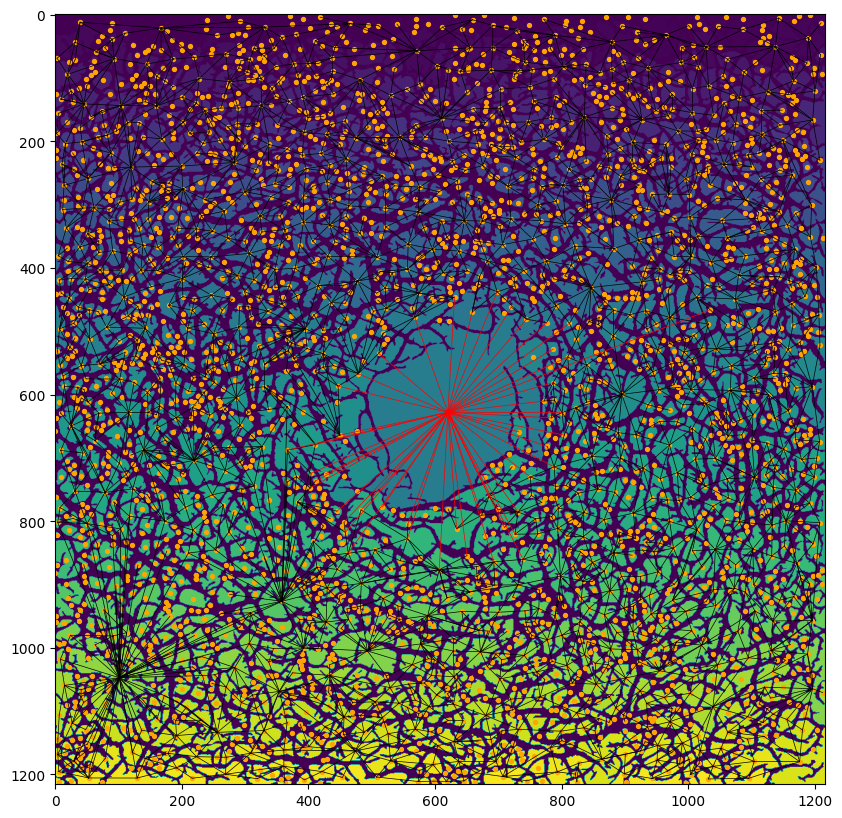

1000096_OD


/home/laurin/Documents/OCTA_project/repo/OCTA_gnn/generator/heterograph_from_vvg_generator.py:151: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  region_labels = measure.label(morphology.remove_small_holes(seg, area_threshold=5, connectivity=1).astype("uint8"), background=1)


KeyboardInterrupt: 

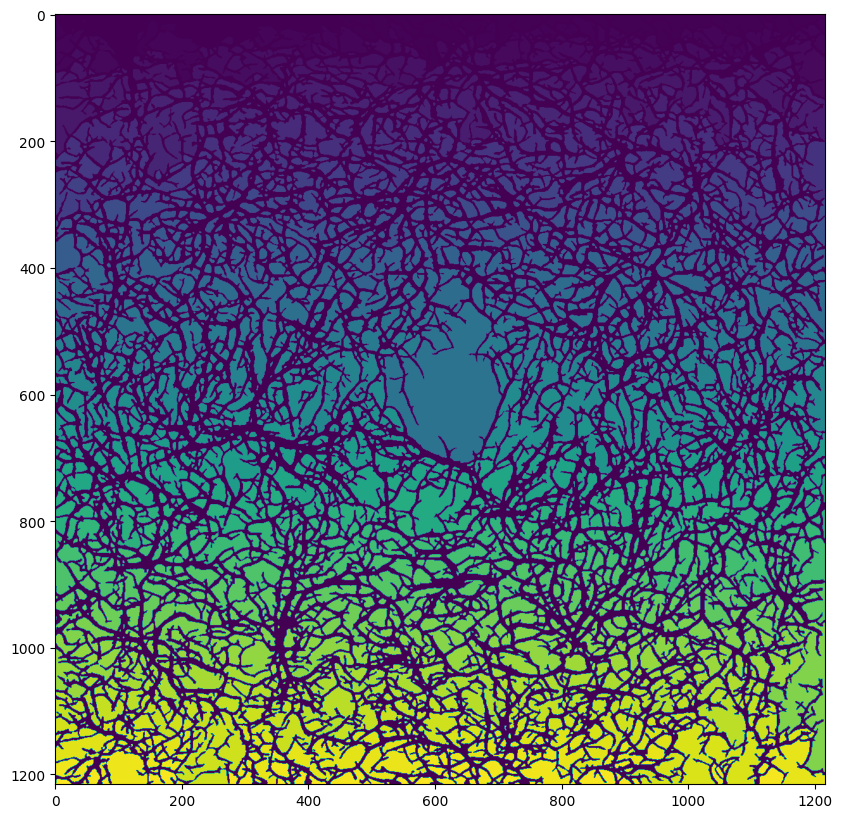

In [6]:

segmentation_path = f"../../TumNeuro/checked_seg_DVC"
json_path = f"../../TumNeuro/checked_seg_DVC_graph/json"
void_graph_save_path = f"../../TumNeuro/checked_seg_DVC_graph/void_graph_faz"
hetero_edges_save_path = f"../../TumNeuro/checked_seg_DVC_graph/hetero_edges_faz"
image_path = f"../../TumNeuro/checked_images_DVC/"

faz_node_save_path = f"../../TumNeuro/checked_seg_DVC_graph/faz_node"
faz_region_edges_save_path = f"../../TumNeuro/checked_seg_DVC_graph/faz_region_edges"
faz_vessel_edges_save_path = f"../../TumNeuro/checked_seg_DVC_graph/faz_vessel_edges"

Gernerator_from_VVG = heterograph_from_vvg_generator.HeterographFromVVGGenerator(
                                                            seg_path= segmentation_path,
                                                            vvg_path= json_path,
                                                            faz_node= True,
                                                            void_graph_save_path= void_graph_save_path,
                                                            hetero_edges_save_path= hetero_edges_save_path,
                                                            image_path= image_path,
                                                            faz_node_save_path= faz_node_save_path,
                                                            faz_region_edges_save_path= faz_region_edges_save_path,
                                                            faz_vessel_edges_save_path= faz_vessel_edges_save_path,
                                                            debug=False)
Gernerator_from_VVG.save_region_graphs()